## Logistic Regression from scratch

Importing data

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking the null values

In [120]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [121]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Creating a function to plot all the independent variables with the dependent variables

In [122]:
def plotting_variables(columns):
    for column in columns:
        plt.figure(figsize=(10,4))
        plt.scatter(data['Outcome'], data[column], marker='o')
        plt.xlabel('Outcome column')
        plt.xlabel(column)
        plt.show()

Defining Y - Outcome

In [123]:
Y = data['Outcome'].to_numpy()
Y = Y.reshape(Y.shape[0],1)
Y.shape

(768, 1)

In [124]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

Defining X

In [125]:
X = data.drop('Outcome', axis='columns').to_numpy()
X.shape

(768, 8)

In [126]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [127]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

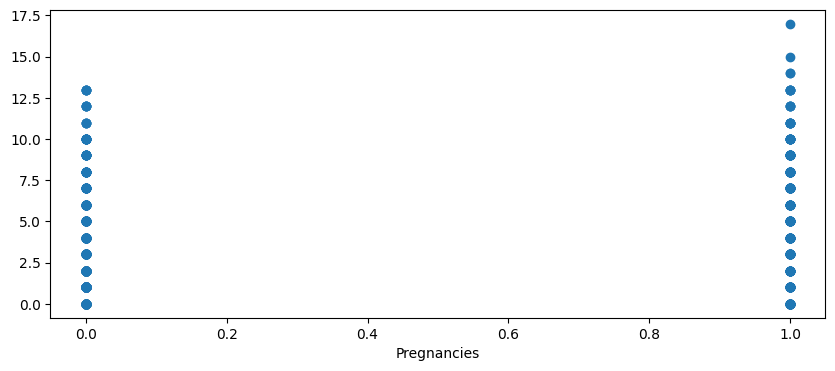

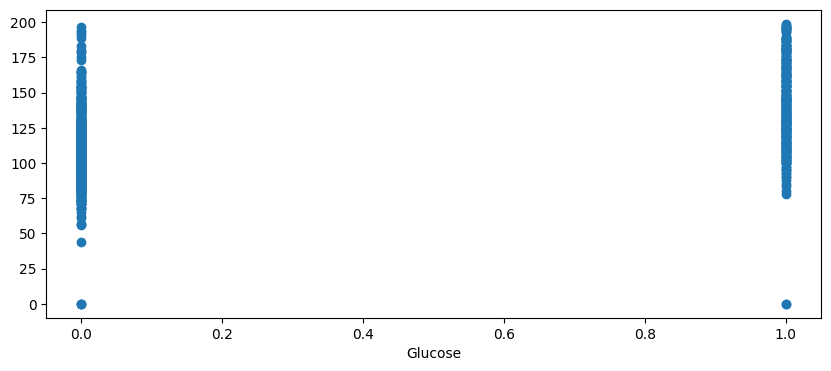

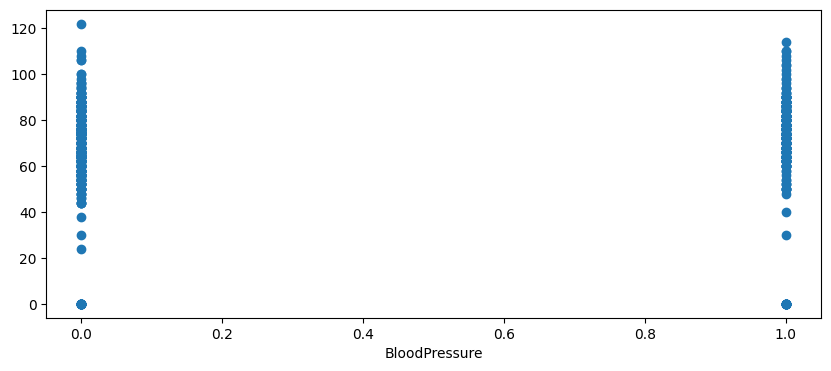

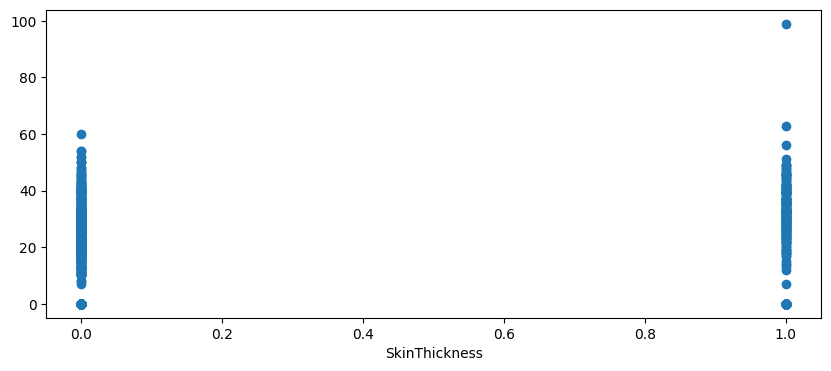

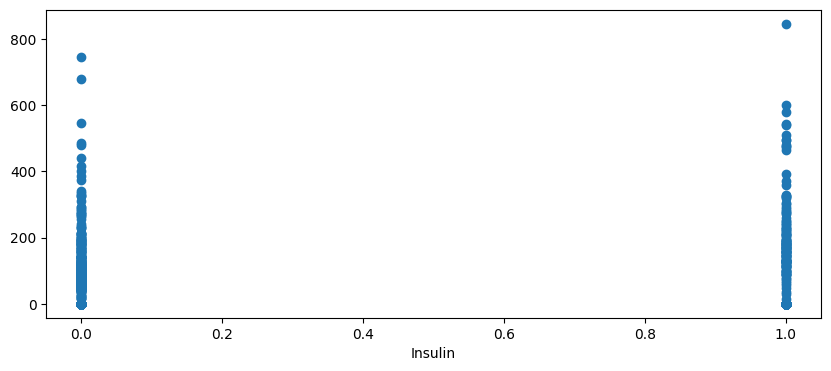

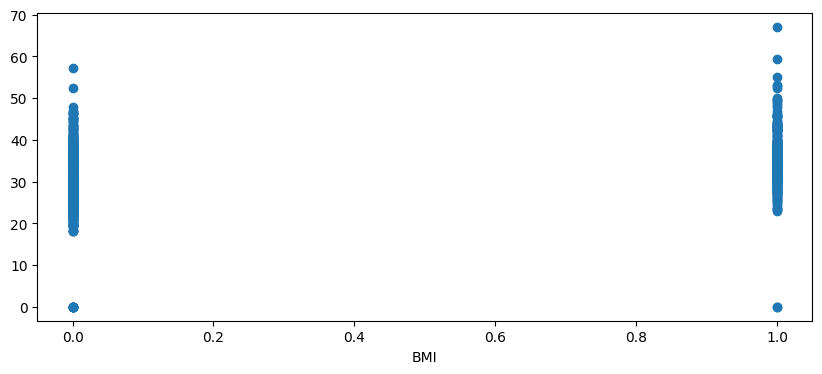

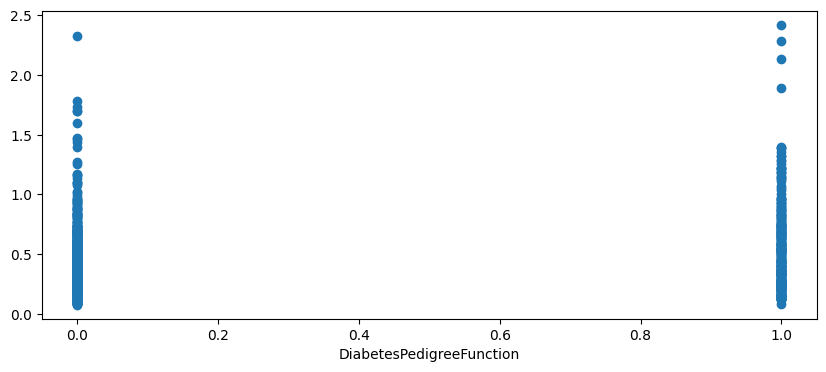

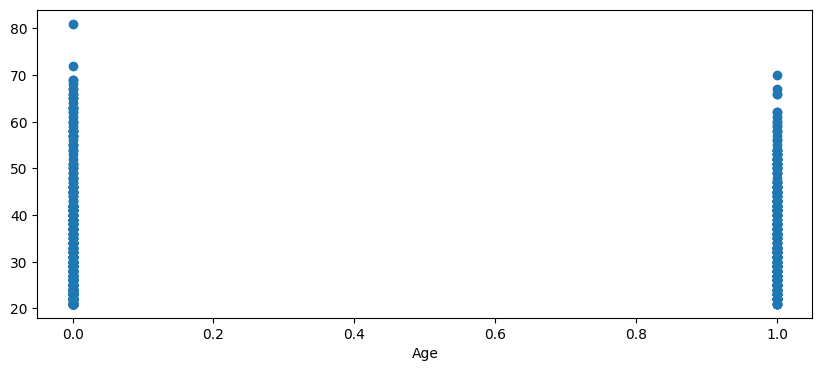

In [128]:
plotting_variables(columns)

## Classification

Splitting the data

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

Defining some variables

In [131]:
m, n = X_train.shape
b, cost_list = 0, []
n

8

Sigmoid function

In [132]:
def sigmoide(z):
 return (1/ (1+ np.exp(-z)))

Creating the thetas

In [133]:
#theta = np.random.rand(X.shape[1]+1, 1)

theta = np.zeros(n+1)
theta = theta.reshape(theta.shape[0], 1)
print(theta.shape)

(9, 1)


In [134]:
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Adding the one column

In [135]:
X_train= np.hstack((np.ones((m, 1)), X_train))
X_train

array([[1.00e+00, 0.00e+00, 1.51e+02, ..., 4.21e+01, 3.71e-01, 2.10e+01],
       [1.00e+00, 1.00e+00, 8.30e+01, ..., 1.82e+01, 6.24e-01, 2.70e+01],
       [1.00e+00, 2.00e+00, 1.22e+02, ..., 3.68e+01, 3.40e-01, 2.70e+01],
       ...,
       [1.00e+00, 4.00e+00, 9.40e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.00e+00, 1.10e+01, 8.50e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [1.00e+00, 5.00e+00, 1.36e+02, ..., 0.00e+00, 6.40e-01, 6.90e+01]])

In [136]:
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
X_test

array([[1.000e+00, 1.000e+00, 1.990e+02, ..., 4.290e+01, 1.394e+00,
        2.200e+01],
       [1.000e+00, 2.000e+00, 1.070e+02, ..., 3.360e+01, 4.040e-01,
        2.300e+01],
       [1.000e+00, 4.000e+00, 7.600e+01, ..., 3.400e+01, 3.910e-01,
        2.500e+01],
       ...,
       [1.000e+00, 1.000e+00, 9.500e+01, ..., 2.390e+01, 2.600e-01,
        2.200e+01],
       [1.000e+00, 1.000e+00, 1.060e+02, ..., 3.750e+01, 1.970e-01,
        2.600e+01],
       [1.000e+00, 1.000e+01, 1.220e+02, ..., 2.760e+01, 5.120e-01,
        4.500e+01]])

Training function

In [137]:
def gd(X_train, Y_train, theta, lr, epochs):
    for i in range(epochs):
        z = np.dot(X_train, theta)
        h = sigmoide(z)
        cost = h - Y_train
        gradiente = np.dot(X_train.T, cost) / m
        theta -= lr * gradiente
    return theta

In [138]:
theta = gd(X_train, Y_train, theta, 0.000017, 100000)
theta

array([[-0.06801827],
       [ 0.08321728],
       [ 0.01274176],
       [-0.02981263],
       [ 0.00440739],
       [ 0.000316  ],
       [-0.00154018],
       [ 0.00852938],
       [-0.00667687]])

Testing the model

In [139]:
z = np.dot(X_test, theta)
h = sigmoide(z)
predictions = (h > 0.5).astype(int)
predictions

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [140]:
accuracy = np.mean(predictions == Y_test)
print('Accuracy:', accuracy)

Accuracy: 0.7402597402597403
